In [1]:
import util
data_dir = "data/1.3_traffic/"
id_dir = "merged_data_ids/1.3_traffic/"
all_records = util.read_data(data_dir,id_dir,10)

Successfully read 1194576 records.


In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString,Point
df = pd.DataFrame(all_records)
df["time"] = df["time_meas"].apply(lambda x: util.align_timestamp(x,10))
df.sort_values(by=['time',"id"],inplace=True)

In [3]:
road_data_gdf = gpd.read_file(r'lane_clean\\lane_v3.geojson')

df['geometry'] = df.apply(lambda row: Point(row['position']['x'], row['position']['y']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry')

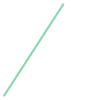

In [10]:
road_data_gdf.loc[1,'geometry']

In [4]:
import tqdm
record = dict()

for index, vehicle in tqdm.tqdm(gdf.iterrows()):
    # 计算车辆与所有道路中心线的最小距离
    if df.loc[index]["type"] in [1,4,5,6]:
        min_distance = float('inf')
        nearest_lane_fid = None
        for _, road in road_data_gdf.iterrows():
            distance = vehicle.geometry.distance(road.geometry)
            if distance < min_distance:
                min_distance = distance
                nearest_lane_fid = road.fid
        time = int(df.loc[index]['time'])
        if nearest_lane_fid not in record.keys():
            record[nearest_lane_fid] = {}
        if time not in record[nearest_lane_fid].keys():
            record[nearest_lane_fid][time] = {"num":0,"v":0,'stop_num':0}
        record[nearest_lane_fid][time]['v'] = (record[nearest_lane_fid][time]["v"]*record[nearest_lane_fid][time]["num"] + df.loc[index]["velocity"])/(record[nearest_lane_fid][time]["num"]+1)
        record[nearest_lane_fid][time]['num'] = record[nearest_lane_fid][time]['num']+1
        if df.loc[index]["velocity"] < 0.5:
            record[nearest_lane_fid][time]['stop_num'] = record[nearest_lane_fid][time]['stop_num']+1


import json
with open("data_jam_10.json", "w") as f:
    json.dump(record, f, ensure_ascii=False)


1194576it [5:08:49, 64.47it/s] 


In [1]:
crossing_lane_map = {
        1:{
            'left':{
                'in_cross':["78","77","76"],
                'out_cross':['79','80'],
            },
            'down':{
                'in_cross':['37','36','35'],
                'out_cross':['33','34'],
            },
            'right':{
                'in_cross':['85','84','83'],
                'out_cross':['81','82']
            }
        },
        2:{
            'left':{
                'in_cross':["90","89","88"],
                'out_cross':['91','92'],
            },
            'down':{
                'in_cross':['235','236','237','238'],
                'out_cross':['239','240','241'],
            },
            'right':{
                'in_cross':['97','96','95'],
                'out_cross':['93','94']
            }
        },
        3:{
            'left':{
                'in_cross':["102","101","100"],
                'out_cross':['103','104'],
            },
            'down':{
                'in_cross':['219','328','327'],
                'out_cross':['326','208'],
            },
            'right':{
                'in_cross':['109','108','107'],
                'out_cross':['105','106']
            }
        },
        4:{
            'left':{
                'in_cross':["114","113","112"],
                'out_cross':['115','116'],
            },
            'down':{
                'in_cross':['228','229','230','231'],
                'out_cross':['232','233','234','223'],
            },
            'right':{
                'in_cross':['121','120','119'],
                'out_cross':['117','118']
            }
        },
        5:{
            'left':{
                'in_cross':["205","191","190",'189','188','187'],
                'out_cross':['192','193','194','195','196','206'],
            },
            'down':{
                'in_cross':['71','70','69'],
                'out_cross':['67','68'],
            },
            'right':{
                'in_cross':['203','202','201','200'],
                'out_cross':['199','198','197'],
            },
            'up':{
                'in_cross':['64','63','62'],
                'out_cross':['65','66'],
            }
        },
        6:{
            'left':{
                'in_cross':["262","261","260",'259'],
                'out_cross':['264','265'],
            },
            'down':{
                'in_cross':['325','324','323','322'],
                'out_cross':['319','320','321'],
            },
            'right':{
                'in_cross':['284','283','282','281'],
                'out_cross':['272','273','274','275','276'],
            },
            'up':{
                'in_cross':['303','302','301','300'],
                'out_cross':['304','305','306'],
            }
        },
        7:{
            'left':{
                'in_cross':["137","136","135",'134','133'],
                'out_cross':['129','130','131','132'],
            },
            'down':{
                'in_cross':['225','5','4','3'],
                'out_cross':['339','340','220'],
            },
            'right':{
                'in_cross':['157','156','155','154','153'],
                'out_cross':['138','139','140'],
            },
            'up':{
                'in_cross':['213','336','335'],
                'out_cross':['337','338','214'],
            }
        },
        8:{
            'left':{
                'in_cross':["147","146","145",'144','143'],
                'out_cross':['148','149','150'],
            },
            'down':{
                'in_cross':['170','169','168','167'],
                'out_cross':['164','165','166'],
            },
            'right':{
                'in_cross':['184','183','182','181','180'],
                'out_cross':['171','172','173','174'],
            },
            'up':{
                'in_cross':['160','159','158'],
                'out_cross':['161','162','163'],
            }
        },
        9:{
            'down':{
                'in_cross':['20','19','18'],
                'out_cross':['12','13','14'],
            },
            'up':{
                'in_cross':['225','26','25','24'],
                'out_cross':['27','28','29','226'],
            }
        },
    }

In [2]:
import json
with open("crossing_lane_map.json", "w") as f:
    json.dump(crossing_lane_map, f, ensure_ascii=False,indent=4)